# Исследование объявлений о продаже квартир

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [72]:
#импортировали библиотеки
import pandas as pd
import numpy as np
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import matplotlib.pyplot as plt

In [73]:
#прочитали данные из файла
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [74]:
pd.set_option('display.max_columns', None)
data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [75]:
#вывели информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В полученном файле 23699 строк и 22 столбца. В 14 столбцах, а именно: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony,locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition есть пустые значения.

### Шаг 2. Предобработка данных

In [76]:
#переименуем столбец cityCenters_nearest для единообразия
data.rename(columns={'cityCenters_nearest':'city_centers_nearest'},inplace=True)

In [77]:
#заменяю пустые значения на False, потому что они могут быть связаны с тем, что это не квартира
data['is_apartment']=data['is_apartment'].fillna(False)

In [78]:
#в столбце floors_total нет экстремальных значений, поэтому заменим пропуски на медианой
#data['floors_total']=data['floors_total'].fillna(data['floors_total'].median())
data['floors_total']=data['floors_total'].fillna(data['floors_total'].mode())

In [79]:
#заменим в столбце ceiling_height экстремальныее значения на nan
data['ceiling_height'] = data['ceiling_height'].replace(data['ceiling_height'].where(data['ceiling_height']>10),np.nan)
#заменим пустые значения медианой
#data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height']=(
    data
    .groupby('floor')['ceiling_height']
    .transform(lambda x: x.fillna(x.median())))

In [80]:
data[data['ceiling_height'].isnull()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.4,28,False,False,False,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,False,False,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0
18218,4,9900000.0,101.0,2018-09-27T00:00:00,3,NaN,35.0,53.4,33,False,False,False,13.7,2.0,Санкт-Петербург,18737.0,20450.0,0.0,NaN,3.0,72.0,7.0
18629,20,5700000.0,54.0,2017-12-08T00:00:00,1,NaN,35.0,21.0,31,False,False,False,18.0,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,128.0


In [81]:
data[data['floor']==28]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.4,28,False,False,False,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0


In [82]:
data[data['floor']==30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1917,13,10150000.0,74.0,2017-11-17T00:00:00,2,2.8,35.0,34.4,30,False,False,False,13.0,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN


In [83]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height']==2.8)

Видим, что 4 значения в столбце ceiling_height остались пустыми, это связано с тем, что для этажей 28, 31,32 и 33 в даном датасете нет значения. Возьмем ближайший этаж, например 30, у него значение потолка 2.8. Поэтому заполним оставшиеся 4 пропуска им.

In [85]:
#так как незаполненное число парков и водоемов связанно скорее всего с тем, что их по близости нет
#заполним пропуски нулями
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#аналогично с балконами
data['balcony'] = data['balcony'].fillna(0)

In [86]:
#заменили пустые значения в толбце city_centers_nearest на медианное значение
#data['city_centers_nearest']=data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())
#аналогично
#data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].median())
#data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].median())
#data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].median())

тогда оставим эти столбцы с пропусками, так как мало данных, далее заполним пропуски в city_centers_nearest

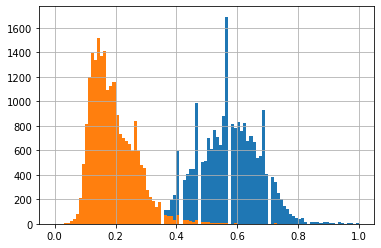

In [87]:
#вычислим отношение жилой площади ко всей
data['living_area_koef'] = round(data['living_area']/data['total_area'], 2)
#вычислим отношение кухонной площади ко всей
data['kitchen_area_koef'] = round(data['kitchen_area']/data['total_area'], 2)
#выведем на график
data['living_area_koef'].hist(bins=100, range=(0, 1))
data['kitchen_area_koef'].hist(bins=100, range=(0, 1))

In [88]:
#исходя из графика средний процент жилой площади ко всей - 55%, кухонной - 15%
#заполним пропуски, умножая всю площадь на коэффициент
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.55)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.15)

In [89]:
#удалим стобцы коэфициентов, так как они нам больше не нужны
del data['living_area_koef']
del data['kitchen_area_koef']

In [90]:
#согласно нашей логике квартир, площадь которых больше площади кухни и жилой площади быть не должно
data_mistake=data.query('total_area<(living_area+kitchen_area)')

In [91]:
#обнаружили 100 строк, неподходящих под нашу логику
data_mistake

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,False,False,6.2000,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,False,False,14.7000,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,True,False,4.0665,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.6,18.0,20.00,9,False,False,False,5.0000,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.7,19.0,30.55,2,False,False,False,9.2800,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.6,5.0,44.00,5,False,False,False,8.0000,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0
22095,6,2194000.0,36.50,2017-09-27T00:00:00,1,2.65,3.0,33.20,3,False,False,False,5.4750,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0
22246,6,3100000.0,27.30,2018-05-29T00:00:00,0,2.7,16.0,23.30,15,False,True,False,4.0950,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
22907,9,65000000.0,228.00,2016-06-02T00:00:00,4,2.65,5.0,200.00,2,False,False,False,34.2000,0.0,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN


In [92]:
#удаляем эти строки, так как причину ошибки найти невозможно
data = data.query('total_area > (living_area+kitchen_area)')

In [93]:
data['floors_total']=data.groupby('floor')['floors_total'].transform(lambda x: x.fillna(x.max()))

Заполним floors_total этажем, на котором указана квартира.

In [94]:
#заменили пустые значения в толбце days_exposition на медианное значение
#data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())

In [95]:
#cгруппируем столбец days_exposition по числу комнат и заполним пропуски медианой.
data['days_exposition']=(
    data
    .groupby('rooms')['days_exposition']
    .transform(lambda x: x.fillna(x.median()))
)

In [96]:
#удалим пустые значения locality_name, так как их очень мало
data.dropna(subset=['locality_name'],inplace=True)

In [97]:
#название населённого пункта запишем в нижнем регистре
data['locality_name'] = data['locality_name'].str.lower()

In [98]:
#не можем сгруппировать по locality_name, тк у некоторых населенных пунктов вообще 
#нет сведений о расстоянии до центра
#data['city_centers_nearest']=(
#    data
#    .groupby('locality_name')['city_centers_nearest']
#    .transform(lambda x: x.fillna(x.median()))
#)

In [99]:
#упорядочим last_price цену и разобьем на 10 групп
data['last_price_category'] = pd.qcut(x=data['last_price'], q=10, labels=range(10))
#cгруппируем city_centers_nearest по группам и заполним пропуски медианой
data['city_centers_nearest'] = (
    data
    .groupby('last_price_category')['city_centers_nearest']
    .transform(lambda x: x.fillna(x.median()))
)

In [100]:
#преобразум столбцы со значениями без дробной части в ип int
data['floors_total'] = data['floors_total'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['ceiling_height'] = data['ceiling_height'].astype('float64')

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23479 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23479 non-null int64
last_price              23479 non-null int64
total_area              23479 non-null float64
first_day_exposition    23479 non-null object
rooms                   23479 non-null int64
ceiling_height          23479 non-null float64
floors_total            23479 non-null int64
living_area             23479 non-null float64
floor                   23479 non-null int64
is_apartment            23479 non-null bool
studio                  23479 non-null bool
open_plan               23479 non-null bool
kitchen_area            23479 non-null float64
balcony                 23479 non-null int64
locality_name           23479 non-null object
airports_nearest        18002 non-null float64
city_centers_nearest    23479 non-null float64
parks_around3000        23479 non-null int64
parks_nearest           8010 non-null float64
ponds_around3000        

В столбце is_apartment пропуски были заменены на Falsе, потому что они могут быть связаны с тем, что этот признак не заполнялся у квартир. В столбце floors_total пропуски были заменены этажен на котором расположена квартира. В столбце ceiling_height значения высоты потолков больше 10 заменены на nan, затем пустые значения были заменены медианой, а для этажей у которых не было высоты потолка, ceiling_height был заменен ближайшим значением.

Так как незаполненное число парков и водоемов связанно скорее всего с тем, что их по близости нет, то заполним пропуски нулями. Аналогично, с балконами.

В столбцах kitchen_area и living_area заменили пустые значения на средний процент, занимаемый кухней или жилой площадью от всей площади. Также были удалены 100 строк, неподходящих под условие total_area = living_area + kitchen_area.

Пропуски в столбцах: cityCenters_nearest, airports_nearest, parks_nearest и ponds_nearest не были заполнены, так как в них слишком мало данных.

Таким образом, были устранены все пропуски, удалены аномальные значения и в итогов датасете осталось 23479 строк. Столбцы floors_total, parks_around3000, ponds_around3000, balcony, days_exposition и last_price были приведены к типу int, так как значения в них не имели дробной части. Столбец locality_name был приведен к нижнему регистру.

### Шаг 3. Посчитайте и добавьте в таблицу

In [102]:
#посчитаем цену квадратного метра
data['metr_price'] = round(data['last_price']/data['total_area'], 2)

In [103]:
#добавим день недели, месяц и год публикации объявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#так как о времени ничего не сказанно, то уберем его
data['first_day_exposition'] = data['first_day_exposition'].dt.date

In [104]:
#этаж квартиры; варианты — первый, последний, другой;
def floor(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
data['floors_category'] = data.apply(floor, axis=1)

In [105]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_koef'] = round(data['living_area']/data['total_area'], 2)
data['kitchen_area_koef'] = round(data['kitchen_area']/data['total_area'], 2)

In [106]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category,metr_price,week_day,month,year,floors_category,living_area_koef,kitchen_area_koef
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0000,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,115,9,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.6000,1,False,False,False,11.000,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,2,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3000,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,5,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.60,14,87.4500,9,False,False,False,23.850,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,9,408176.10,4,7,2015,другой,0.55,0.15
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0000,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,8,100000.00,1,6,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3000,3,False,False,False,13.830,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,115,8,72490.85,1,3,2017,другой,0.55,0.10
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0000,4,False,False,False,8.500,0,тосно,NaN,17062.0,0,NaN,0,NaN,45,1,52542.37,0,1,2018,другой,0.64,0.14
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7000,1,False,False,False,8.505,0,село рождествено,NaN,28441.0,0,NaN,0,NaN,91,0,44091.71,6,2,2018,первый,0.52,0.15
23697,13,11475000,76.75,2017-03-28,2,3.00,17,42.2125,12,False,False,False,23.300,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602,9,149511.40,1,3,2017,другой,0.55,0.30


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.653552  0.758636        0.369697
last_price        0.653552    1.000000  0.361908        0.277618
rooms             0.758636    0.361908  1.000000        0.224875
ceiling_height    0.369697    0.277618  0.224875        1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c76b97450>,
      dtype=object)

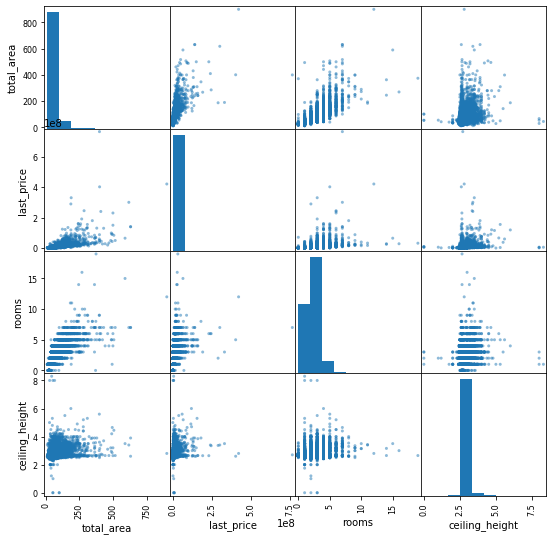

In [107]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Постройте гистограммы для каждого параметра.

data_param= data.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
#найдем корреляцию
print(data_param.corr())
#построим гистограммы
pd.plotting.scatter_matrix(data_param, figsize=(9, 9))

Анализируя график можно сделать вывод, что: 

- с увеличением числа комнат цена растет
- с ростом площади цена растет
- чем выше потолки, тем больше цена

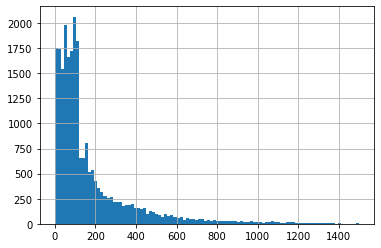

In [108]:
#Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану.
#Опишите, сколько обычно занимает продажа. 
#Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

#построим гистограмму
data['days_exposition'].hist(bins=100, range=(0, 1500))

In [109]:
#посчитаем среднее время продажи
data['days_exposition'].mean()

170.83291451935773

In [110]:
#посчитаем медиану продажи
data['days_exposition'].median()

92.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6c53ed9650>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6c53ed5b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6c53f1fa90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6c53edca90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6c53ed9cd0>],
 'means': []}

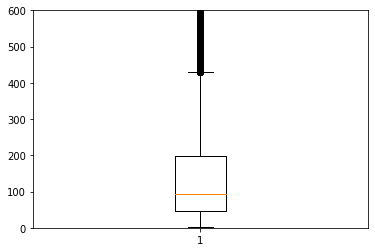

In [111]:
#построим диаграму размаха
plt.ylim(0, 600)
plt.boxplot(data['days_exposition'])

Продажа обычно занимает 100 дней. Продажа прошла очень быстро, если попала в 0, так как в размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками.Продажа проходила необычно долго, если ее значение больше 440.

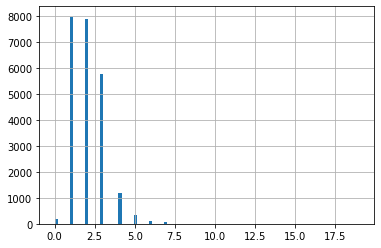

In [112]:
#Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

#строим гистограму по столбцу rooms
data['rooms'].hist(bins=100)

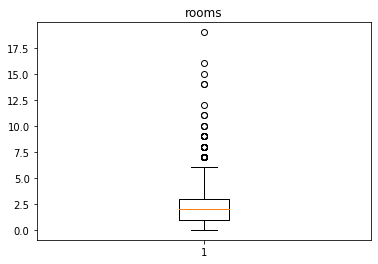

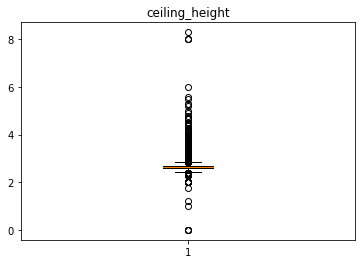

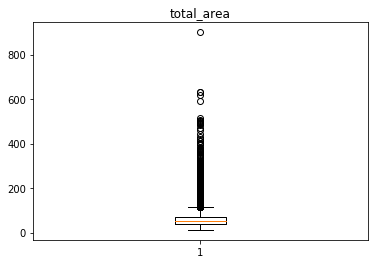

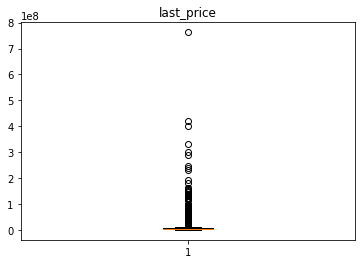

In [113]:
for col in ['rooms','ceiling_height','total_area','last_price']:
    plt.figure();
    plt.boxplot(data[col]);
    plt.title(col)

In [114]:
#видим, что квартир с количеством комнат болше 8 очень мало, поэтому можно убрать эти строки
print(data['rooms'].unique())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


In [115]:
#берем только те строки, где комнат меньше 6
data = data.query('rooms < 6')

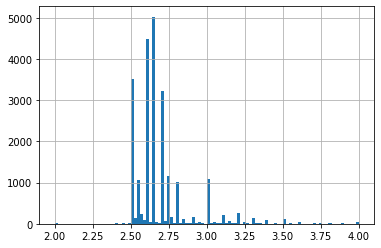

In [116]:
#построим гистограму высоты потолков
data['ceiling_height'].hist(bins=100, range=(2, 4))

In [117]:
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())

0.0
8.3


In [118]:
#исключим значения меньше 2 и больше 4 метров, потому что их мало
data = data.query('2 < ceiling_height < 4')

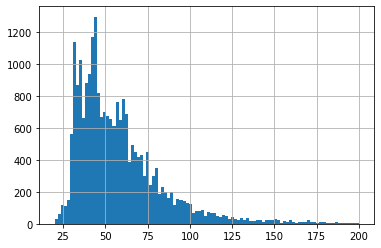

In [119]:
#построим гистограму площади квартиры в квадратных метрах (м²)
data['total_area'].hist(bins=100, range=(20, 200))

In [120]:
print(data['total_area'].min())
print(data['total_area'].max())

12.0
500.0


In [121]:
#исключим значения меньше 20 и больше 180 квадратных метров, потому что их мало
data = data.query('20 < total_area < 180')

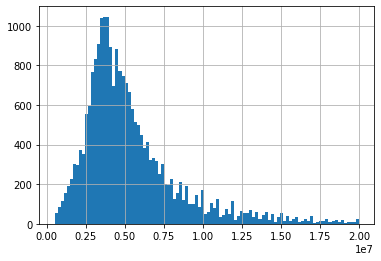

In [122]:
#построим гистограму цены на момент снятия с публикации
data['last_price'].hist(bins=100, range=(500000, 20000000))

In [123]:
print(data['last_price'].min())
print(data['last_price'].max())

12190
135000000


In [124]:
#исключим значения меньше 500 тысяс и больше 20 миллионов, потому что их мало
data = data.query('500000 < last_price < 20000000')

In [125]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category,metr_price,week_day,month,year,floors_category,living_area_koef,kitchen_area_koef
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0000,8,False,False,False,25.000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,115,9,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.6000,1,False,False,False,11.000,2,посёлок шушары,12817.0,18603.0,0,NaN,0,NaN,81,2,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3000,4,False,False,False,8.300,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,5,92785.71,3,8,2015,другой,0.61,0.15
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0000,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,8,100000.00,1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.4000,5,False,False,False,9.100,0,городской посёлок янино-1,NaN,17062.0,0,NaN,0,NaN,55,1,95065.79,0,9,2018,другой,0.47,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3000,3,False,False,False,13.830,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,115,8,72490.85,1,3,2017,другой,0.55,0.10
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0000,4,False,False,False,8.500,0,тосно,NaN,17062.0,0,NaN,0,NaN,45,1,52542.37,0,1,2018,другой,0.64,0.14
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.7000,1,False,False,False,8.505,0,село рождествено,NaN,28441.0,0,NaN,0,NaN,91,0,44091.71,6,2,2018,первый,0.52,0.15
23697,13,11475000,76.75,2017-03-28,2,3.00,17,42.2125,12,False,False,False,23.300,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602,9,149511.40,1,3,2017,другой,0.55,0.30


In [126]:
#найдем процент оставшихся строк после удаления
22599/23479*100

96.25196984539376

Были проанализированные и исключены редкие и выбивающиеся значения в столбцах rooms, ceiling_height, total_area и last_price. Анализ был проведен с помощью гистограм. В очищенном датасете 22599 строк, это 96% от исходного датасета.

In [127]:
#Какие факторы больше всего влияют на стоимость квартиры? 
#Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 

                      metr_price     rooms  last_price  city_centers_nearest
metr_price              1.000000 -0.133369    0.652771             -0.511694
rooms                  -0.133369  1.000000    0.484030             -0.165859
last_price              0.652771  0.484030    1.000000             -0.470147
city_centers_nearest   -0.511694 -0.165859   -0.470147              1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c4edcd950>,
      dtype=object)

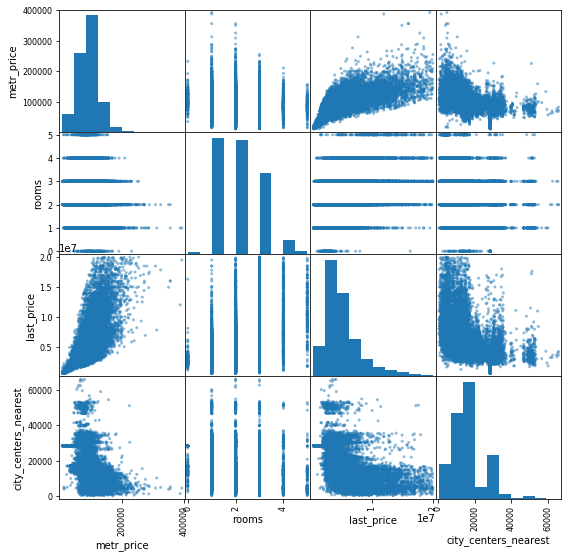

In [128]:
data_param_2 = data.loc[:, ['metr_price', 'rooms', 'last_price', 'city_centers_nearest']]
#найдем корреляцию
print(data_param_2.corr())
#построим гистограммы
pd.plotting.scatter_matrix(data_param_2, figsize=(9, 9))

По корреляционной матрице можно сделать вывод, что цена, цена за метр и количество комнат не связано с растоянием до центра. А цена за квадратный метр не зависит от количества комнат.
Анализируя график можно сделать вывод, что: 

- с увеличением числа комнат цена растет
- с ростом площади цена растет
- с ростом цены цена за метр растет

In [129]:
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

                 last_price
floors_category            
другой              4720000
первый              3899000
последний           4195000


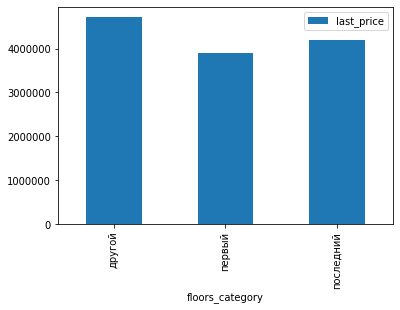

In [130]:
#создадим сводную таблицу для floors_category и last_price
data_pivot_floors_category = data.pivot_table(index='floors_category', values='last_price', aggfunc='median')
#построим график
data_pivot_floors_category.plot(y='last_price', kind ='bar')
print(data_pivot_floors_category)

На первом этаже самые дешевые квартиры, а квартиры со значением "другой" самые дорогие.

In [131]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года.

          last_price
week_day            
0            4550000
1            4650000
2            4600000
3            4500000
4            4500000
5            4500000
6            4500000


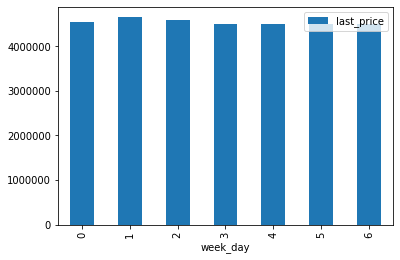

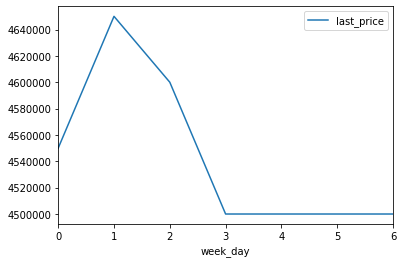

In [132]:
data_pivot_week_day = data.pivot_table(index='week_day', values ='last_price', aggfunc='median')
data_pivot_week_day.plot(y='last_price', kind ='bar')
data_pivot_week_day.plot(y='last_price', kind ='line')
print(data_pivot_week_day)

       last_price
month            
1         4500000
2         4550000
3         4565000
4         4700000
5         4500000
6         4300000
7         4500000
8         4500000
9         4600000
10        4500000
11        4600000
12        4600000


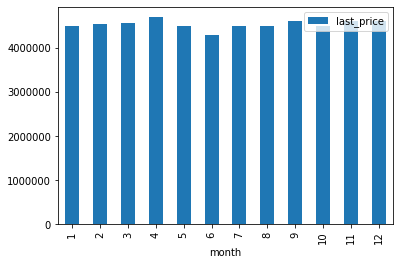

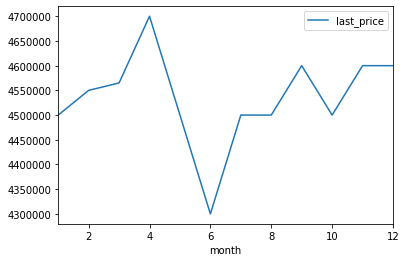

In [133]:
data_pivot_month = data.pivot_table(index='month', values ='last_price', aggfunc='median')
data_pivot_month.plot(y='last_price', kind ='bar')
data_pivot_month.plot(y='last_price', kind ='line')
print(data_pivot_month)

      last_price
year            
2014     6500000
2015     5100000
2016     4400000
2017     4400000
2018     4500000
2019     4960000


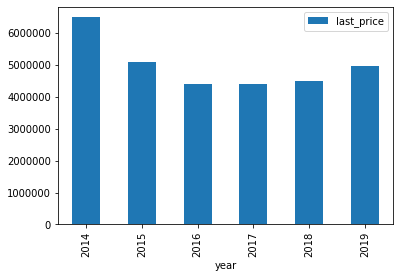

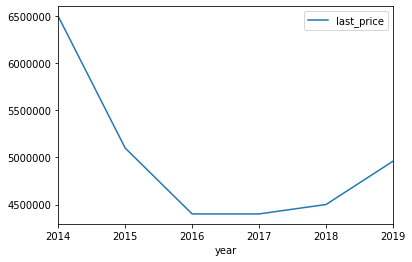

In [134]:
data_pivot_year = data.pivot_table(index='year', values ='last_price', aggfunc='median')
data_pivot_year.plot(y='last_price', kind ='bar')
data_pivot_year.plot(y='last_price', kind ='line')
print(data_pivot_year)

Цена на квартиры растут с понеделька на вторник, во вторник цены на квартиры максимальны. Со вторника по пятницу цены падают. С пятницы по воскресенье цены держаться на одном уровне.
В апреле были пазмещены самы дорогие квартиры, в июне самые дешевые.
C 2014 году цены на квартиры упали, а с 2017 наблюдается рост цен на квартиры.

In [135]:
#"Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
#Эти данные можно найти по имени в столбце 'locality_name'. "

In [136]:
data_pivot_locality_name = data.pivot_table(index='locality_name', values ='metr_price', aggfunc='count')
data_pivot_locality_name = data_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
#возьмем 11 первых значений, так как первым будет санкт-петербург
print(data_pivot_locality_name.head(11))

                   metr_price
locality_name                
санкт-петербург         14732
посёлок мурино            514
посёлок шушары            438
всеволожск                386
пушкин                    355
колпино                   336
посёлок парголово         325
гатчина                   302
деревня кудрово           294
выборг                    228
петергоф                  196


In [137]:
#создадим словарь с этими населенными пунктами
list_locality_name = ['посёлок мурино',
                      'посёлок шушары', 
                      'всеволожск', 
                      'пушкин', 
                      'колпино', 
                      'посёлок парголово', 
                      'деревня кудрово',
                      'гатчина',
                      'выборг',
                      'петергоф']
data_locality = data.query('locality_name in @list_locality_name')
#перепишем data_pivot_locality_name
data_pivot_locality_name = data_locality.pivot_table(index='locality_name', 
                                                   values =['metr_price', 'city_centers_nearest'], 
                                                   aggfunc='median')
data_pivot_locality_name = data_pivot_locality_name.sort_values(by = 'metr_price', ascending = False)
print(data_pivot_locality_name)

                   city_centers_nearest  metr_price
locality_name                                      
пушкин                          27941.0   99706.740
деревня кудрово                 14501.0   91930.235
посёлок парголово               19311.0   91642.860
посёлок мурино                  15277.5   85697.395
петергоф                        33771.0   81969.005
посёлок шушары                  24211.0   76747.970
колпино                         32000.0   74723.745
гатчина                         17062.0   67671.510
всеволожск                      15277.5   65737.870
выборг                          17062.0   58417.025


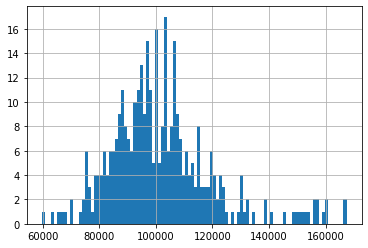

In [138]:
#проверим пушкин
data_pushkin = data.query('"пушкин" in locality_name')
data_pushkin['metr_price'].hist(bins=100)
#гистограма не аномальна

Пушкин удален от центра, но лидирует по ценам за квадратный метр. Можно сделать вывод, что в этом городе высокий уровень жизни.
Деревня кудрово, посёлок парголово и посёлок мурино находятся либо в пределах КАД, либо в непосредственной близости с ним, этим объясняется высокая цена на квадратный метр.
Петергоф наиболее удален от центра, однако цена ща квадратный метр высокая, это связано с тем, что это туристическое место.
Значения расстояния от центра для гатчины, всеволожска и выборга были заполнены средним, однако исходя из цены за квадратный метр, можно сделать вывод, что эти населенные пункты находятся дальше от центра с чем и связана их низкая стоимость цены за квадратный метр.

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


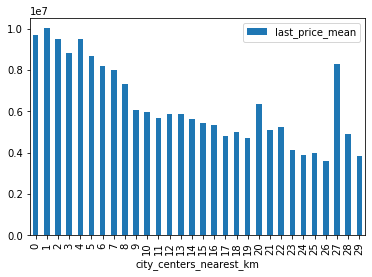

In [142]:
#выберем квартиры в санкт-петербурге
data_spb=data.query('locality_name == "санкт-петербург"')
#создаем столбец с расстоянием до центра в километрах
data_spb.loc[:,'city_centers_nearest_km']=data_spb['city_centers_nearest']/1000
#округляем до целых значений
data_spb.loc[:,'city_centers_nearest_km']=data_spb['city_centers_nearest_km'].astype('int')
#считаем среднюю цену для каждого километра
data_spb_mean=data_spb.groupby('city_centers_nearest_km').agg({'last_price':['mean']})
#меняем название столбца
data_spb_mean.columns=['last_price_mean']
#построим график
data_spb_mean.plot(y='last_price_mean', kind ='bar')

In [143]:
data_spb_mean.min()

last_price_mean    3575000.0
dtype: float64

In [144]:
data_spb_mean.max()

last_price_mean    1.003180e+07
dtype: float64

По графику видно, что чем дальше квартира от центра, тем меньше на нее цена. Однако на 20 и 27 км наблюдаются большие значения, это может быть связано с тем, что на этом расстоянии располложены туристические места. График начинает убывать с отметки в 5 км, можно сказать, что это центральная зона. Стоимомть квартир по городу варьируется от 3575000 до 10031800 рублей.

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.694944  0.796932        0.235873
last_price        0.694944    1.000000  0.448975        0.195450
rooms             0.796932    0.448975  1.000000        0.191714
ceiling_height    0.235873    0.195450  0.191714        1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c4e3075d0>,
      dtype=object)

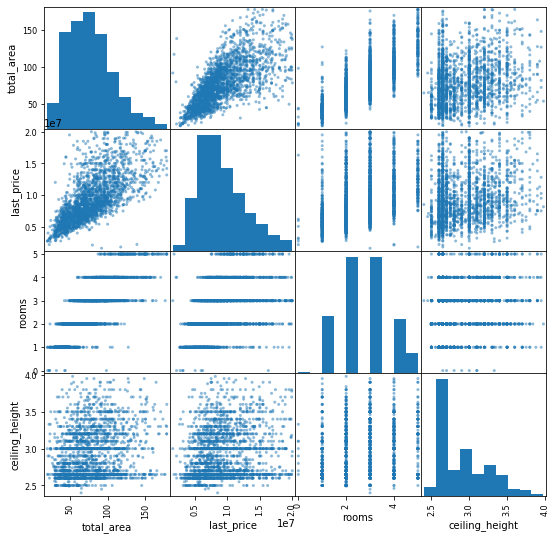

In [150]:
#выделяем сегмент квартир в центре
data_spb_5 = data_spb.query('city_centers_nearest_km < 6')
flat_data_spb_5 = data_spb_5.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
print(flat_data_spb_5.corr())
pd.plotting.scatter_matrix(flat_data_spb_5, figsize=(9, 9))

Из графиков видно, что:

- с увеличением площади растет цена
- с увеличением числа комнат цена тоже растет
- с увеличением высоты потолков цена незначительно растет

       last_price
rooms            
0         4125000
1         6000001
2         7700000
3         9125000
4        10555000
5        12350000


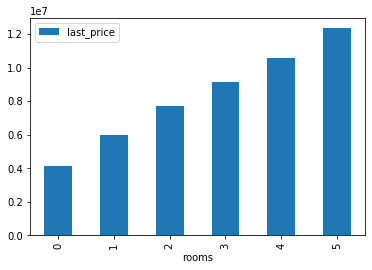

In [151]:
#Также выделите факторы, которые влияют на стоимость квартиры 
#(число комнат, этаж, удалённость от центра, дата размещения объявления).
data_pivot_spb_rooms = data_spb_5.pivot_table(index='rooms', values ='last_price', aggfunc='median')
data_pivot_spb_rooms.plot(y='last_price', kind ='bar')
print(data_pivot_spb_rooms)


C увеличением числа комнат, цена растет.

                 last_price
floors_category            
другой              8765000
первый              6525000
последний           8569500


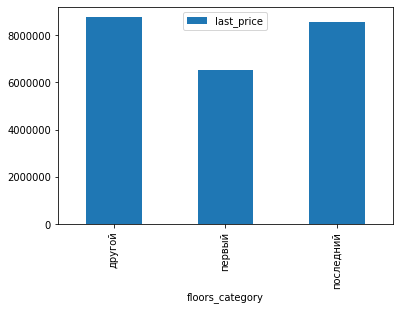

In [152]:
data_pivot_spb_floor = data_spb_5.pivot_table(index='floors_category', values ='last_price', aggfunc='median')
data_pivot_spb_floor.plot(y='last_price', kind ='bar')
print(data_pivot_spb_floor)

На первом этаже квартиры самые дешевые.

                         last_price
city_centers_nearest_km            
0                           9000000
1                           9200000
2                           8900000
3                           8000000
4                           8765000
5                           7969056


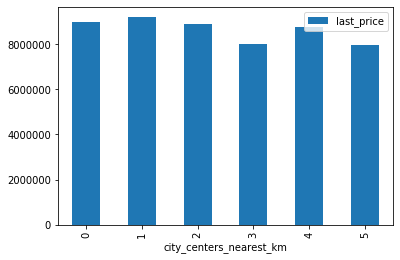

In [153]:
data_pivot_spb_km = data_spb_5.pivot_table(index='city_centers_nearest_km', values ='last_price', aggfunc='median')
data_pivot_spb_km.plot(y='last_price', kind ='bar')
print(data_pivot_spb_km)


В центре цена на квартире стабильно высокая.

      last_price
year            
2014    12738000
2015     8945000
2016     8525000
2017     8095000
2018     8425000
2019     8870000


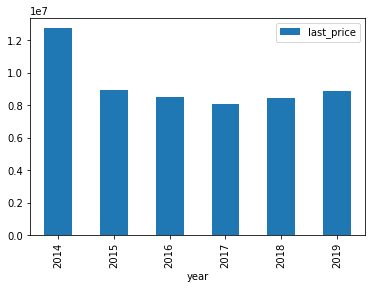

In [154]:
data_pivot_spb_year = data_spb_5.pivot_table(index='year', values ='last_price', aggfunc='median')
data_pivot_spb_year.plot(y='last_price', kind ='bar')
print(data_pivot_spb_year)

В 2015 цена на квартиры в центре знаительно снизилась и продолжает держаться на одном уровне до 2019.

       last_price
month            
1         8550000
2         8500000
3         8595000
4         8245000
5         8300000
6         8200000
7         8497500
8         8350000
9         9000000
10        8299000
11        8500000
12        7711300


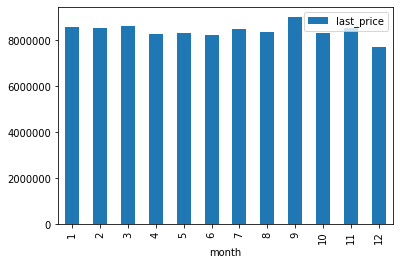

In [155]:
data_pivot_spb_month = data_spb_5.pivot_table(index='month', values ='last_price', aggfunc='median')
data_pivot_spb_month.plot(y='last_price', kind ='bar')
print(data_pivot_spb_month)


Самая высокая цена на квартиры в сентябре, самая низкая в декабре.

          last_price
week_day            
0            8600000
1            8385000
2            8510000
3            8270000
4            8480000
5            8150000
6            8900000


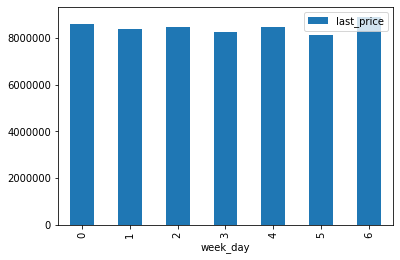

In [156]:
data_pivot_spb_day = data_spb_5.pivot_table(index='week_day', values ='last_price', aggfunc='median')
data_pivot_spb_day.plot(y='last_price', kind ='bar')
print(data_pivot_spb_day)


Цена на квартиры на протяжении недели держиться приблизительно на одно уровне.

Стоимость квартир в центре выше, чем в целом по городу. Остальные же зависимоти идентичны городу.

### Шаг 5. Общий вывод

Был проведен анализ данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Датасет был приведен к нормальному виду, а именно были заменены пропуски и устранены аномальные значения.

Были выявлены следующие зависимости
- с увеличением числа комнат цена растет
- с ростом площади цена растет
- чем выше потолки, тем больше цена.

На первом этаже самые дешевые квартиры, а квартиры со значением "другой" самые дорогие. Цена на квартиры растут с понеделька на вторник, во вторник цены на квартиры максимальны. Со вторника по пятницу цены падают. С пятницы по воскресенье цены держаться на одном уровне. В апреле были пазмещены самы дорогие квартиры, в июне самые дешевые. C 2014 году цены на квартиры упали, а с 2017 наблюдается рост цен на квартиры.

Пушкин удален от центра, но лидирует по ценам за квадратный метр. Можно сделать вывод, что в этом городе высокий уровень жизни. Деревня кудрово, посёлок парголово и посёлок мурино находятся либо в пределах КАД, либо в непосредственной близости с ним, этим объясняется высокая цена на квадратный метр. Петергоф наиболее удален от центра, однако цена ща квадратный метр высокая, это связано с тем, что это туристическое место. Значения расстояния от центра для гатчины, всеволожска и выборга были заполнены средним, однако исходя из цены за квадратный метр, можно сделать вывод, что эти населенные пункты находятся дальше от центра с чем и связана их низкая стоимость цены за квадратный метр.

Чем дальше квартира в Санкт-Петербурге от центра, тем меньше на нее цена. Однако на 20 и 27 км наблюдаются большие значения, это может быть связано с тем, что на этом расстоянии располложены туристические места. График начинает убывать с отметки в 5 км, можно сказать, что это центральная зона. Стоимомть квартир по городу варьируется от 3575000 до 10031800 рублей.

Стоимость квартир в центре выше, чем в целом по городу. Остальные же зависимоти идентичны городу.
